# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
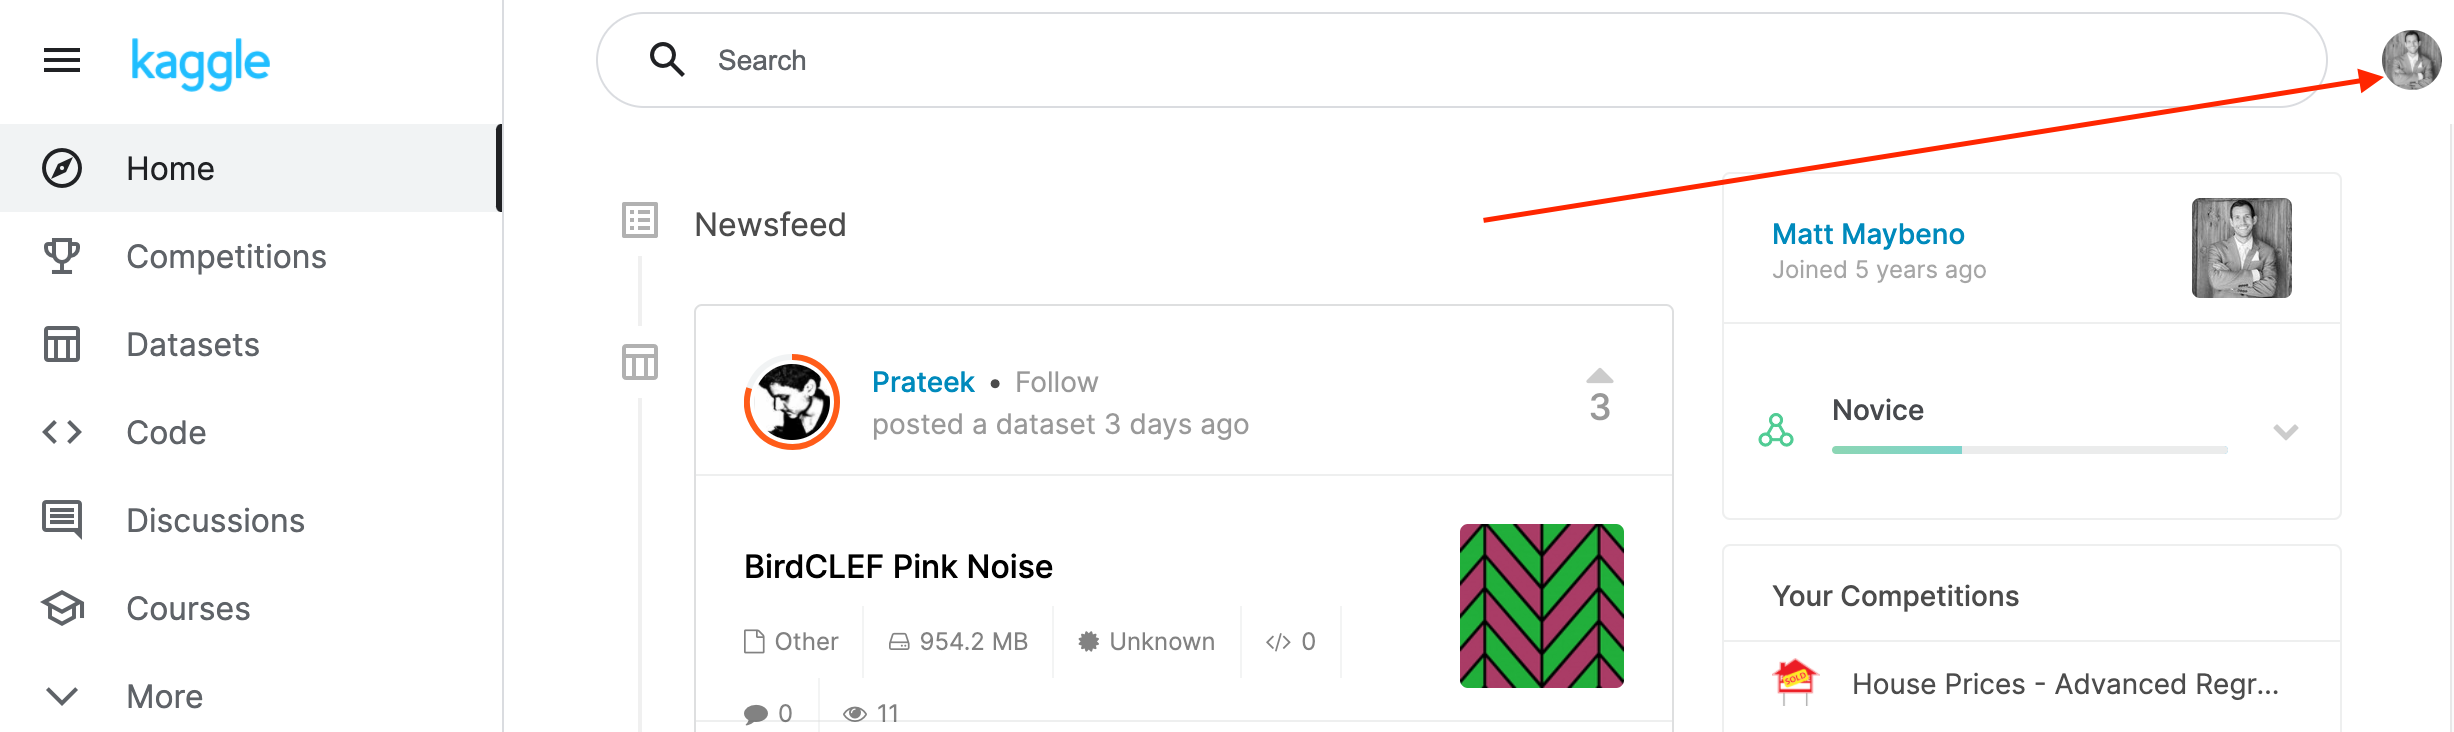
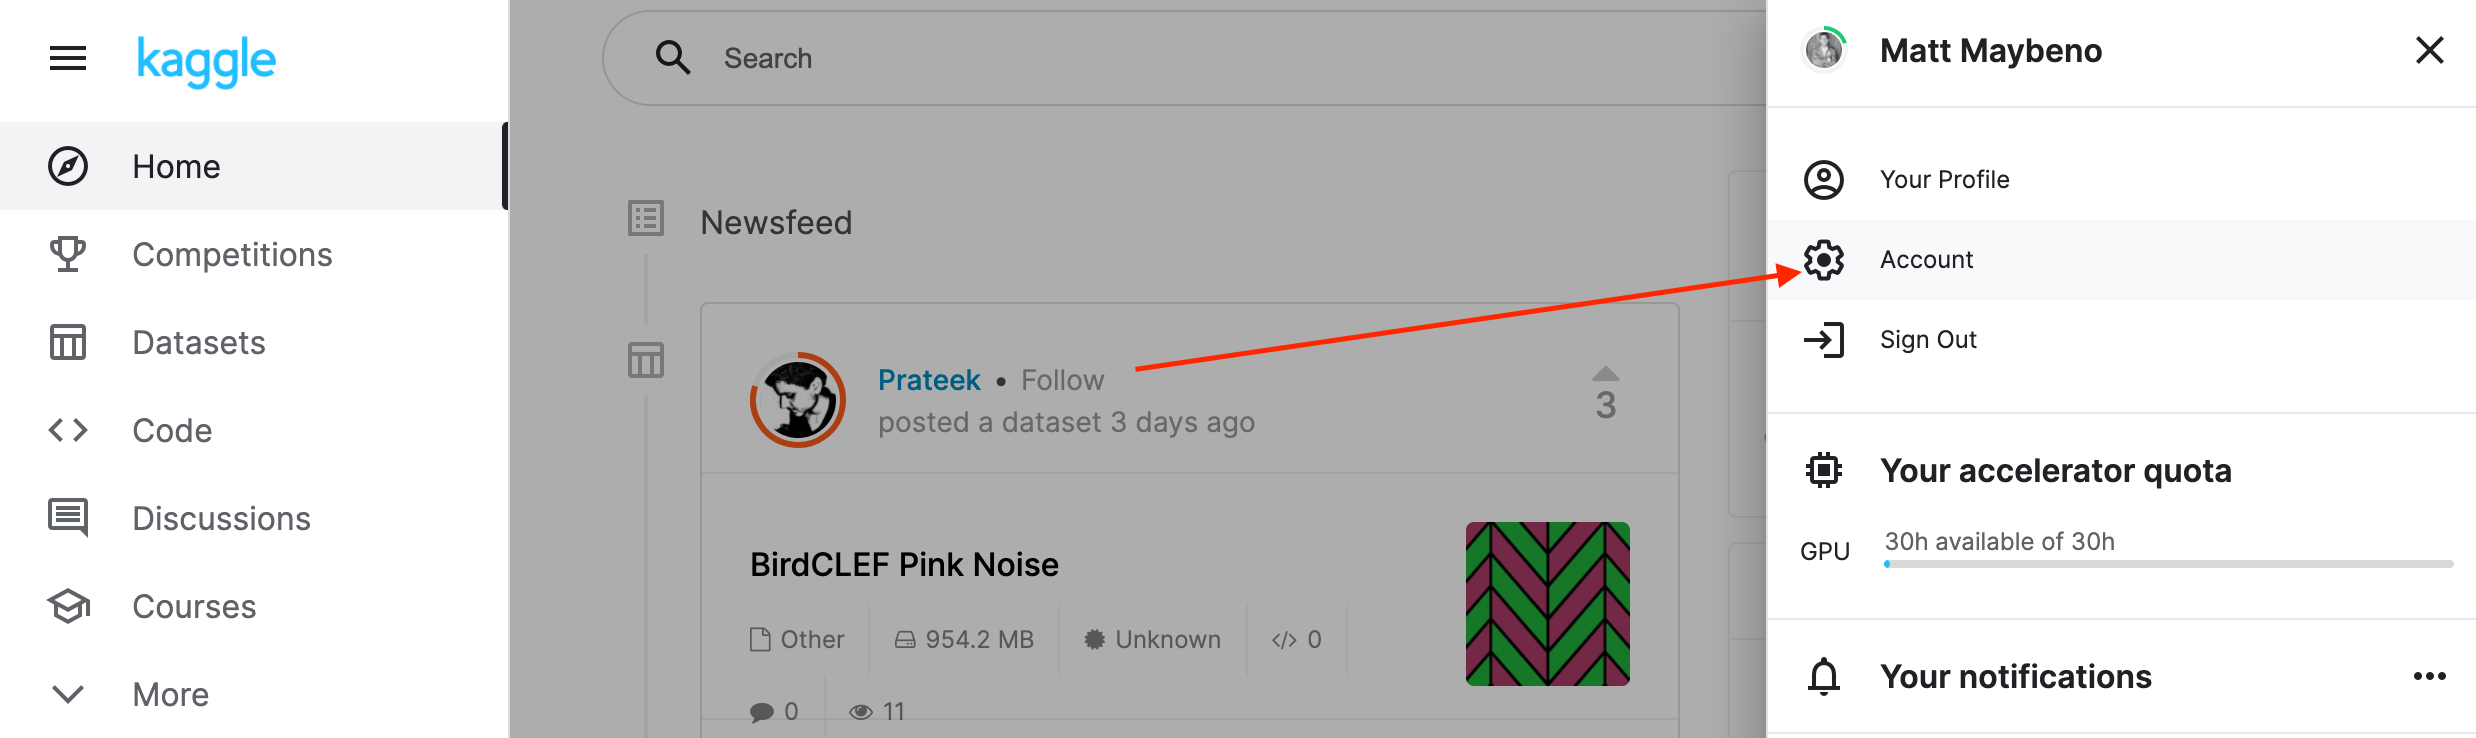
2. Scroll down to API and click Create New API Token.
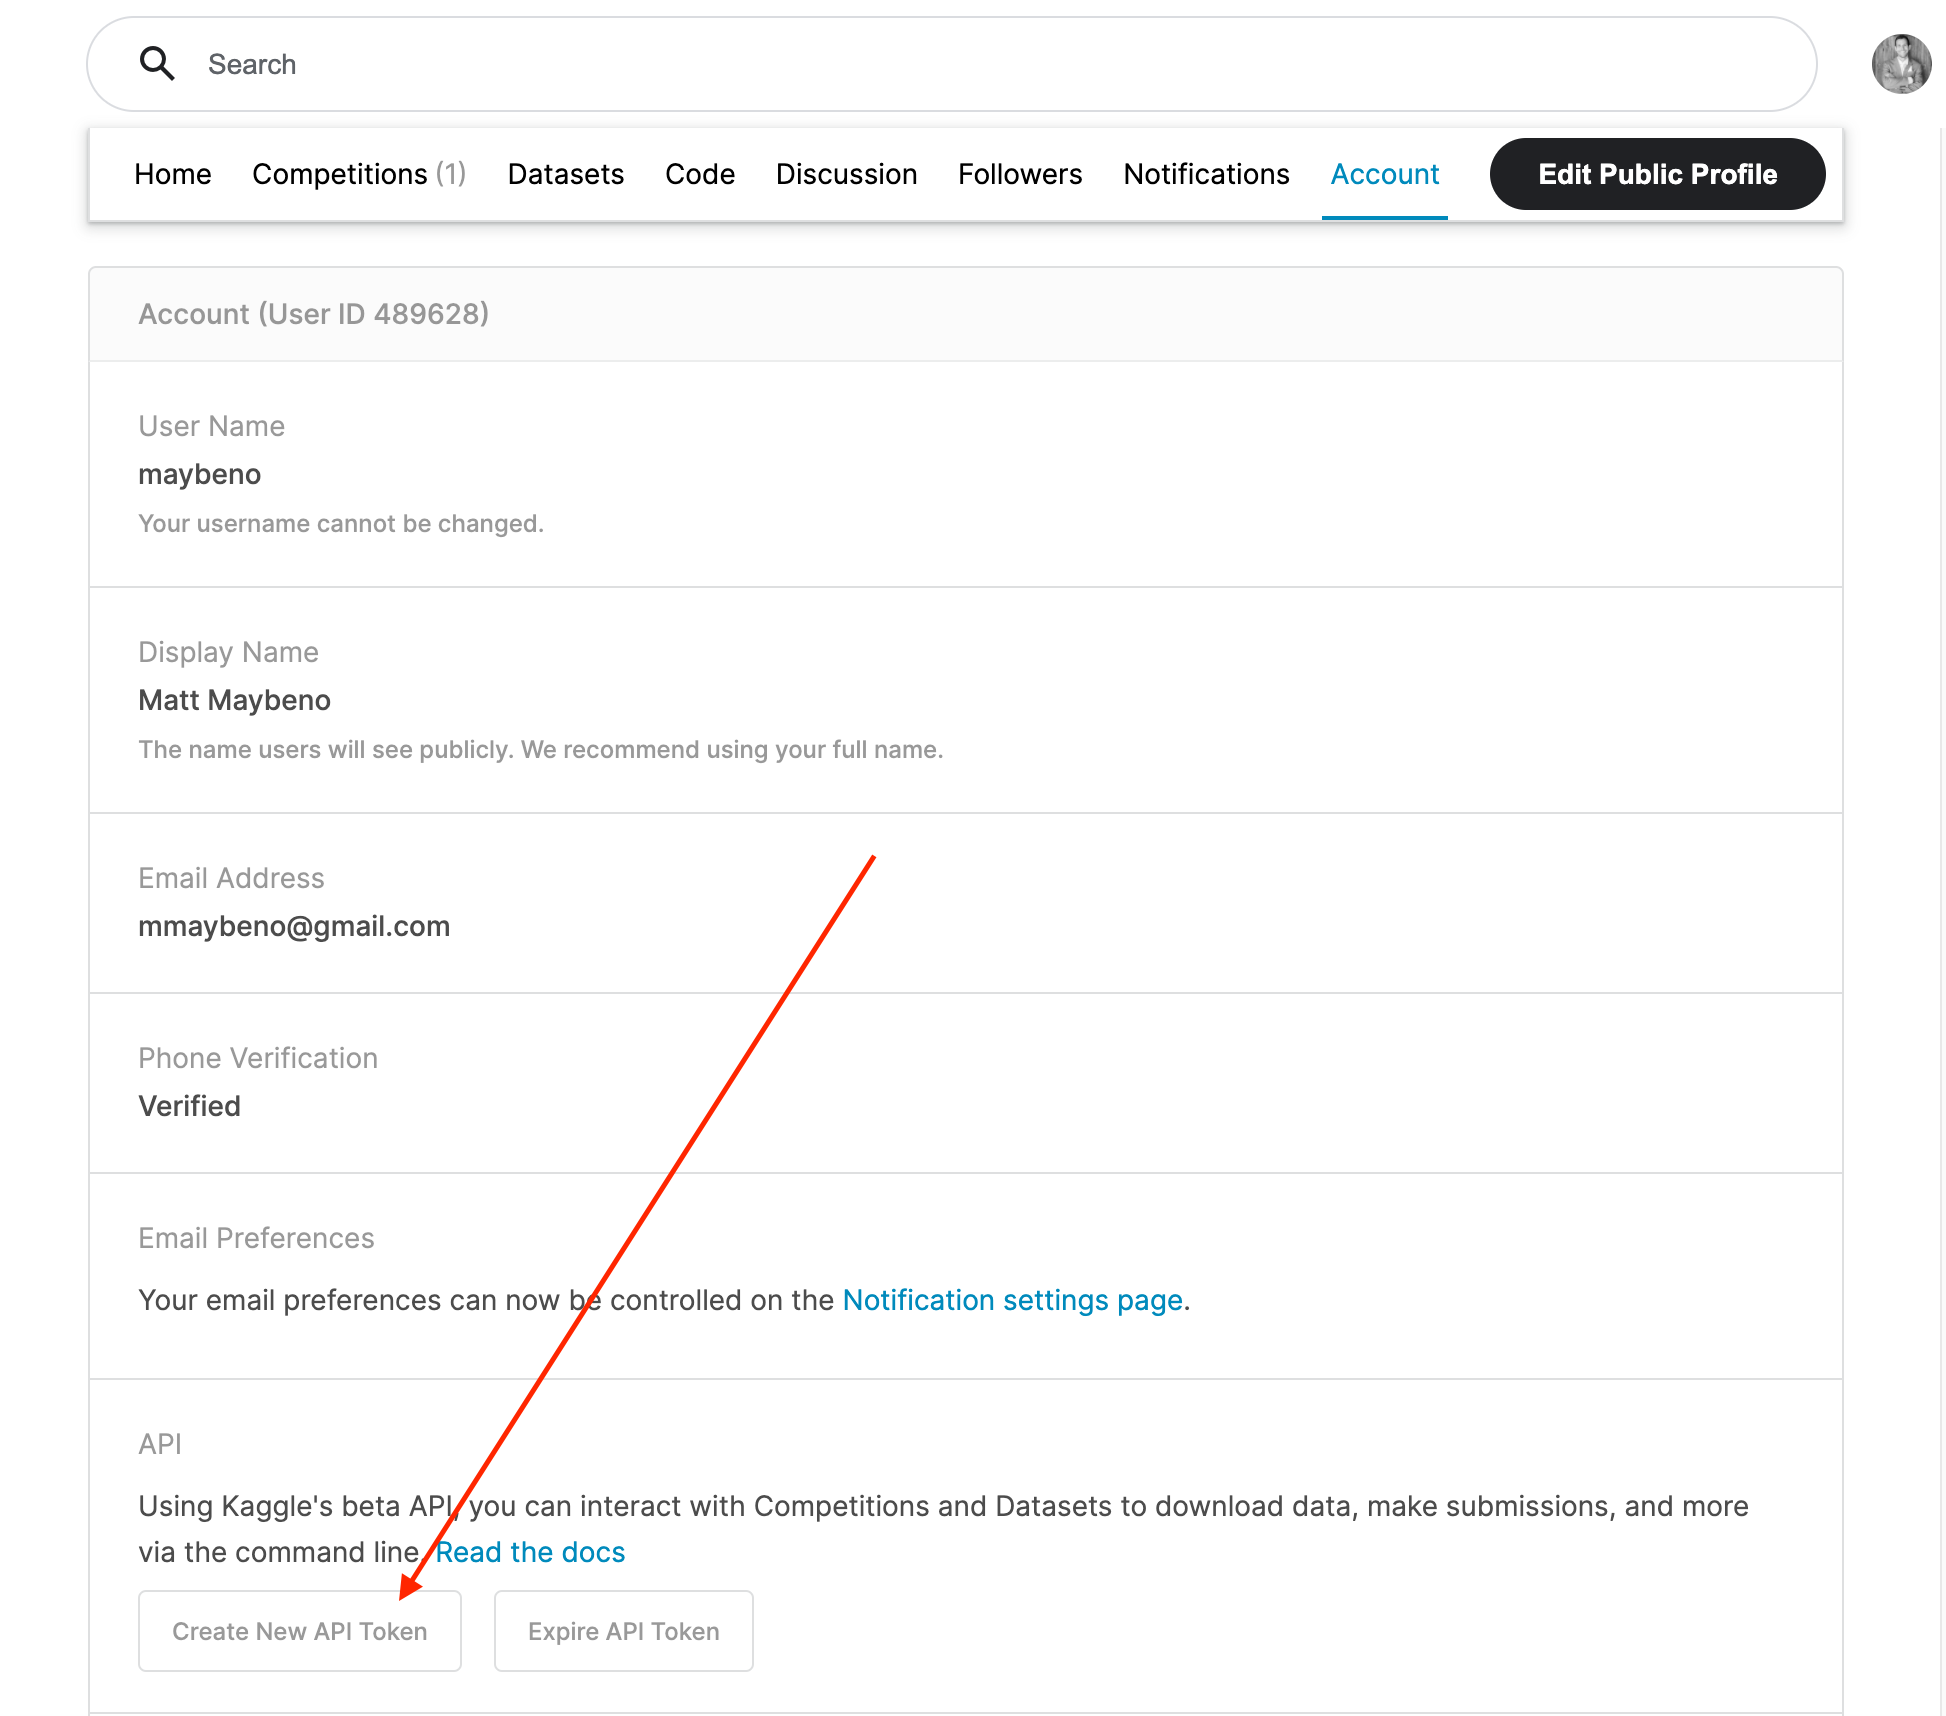
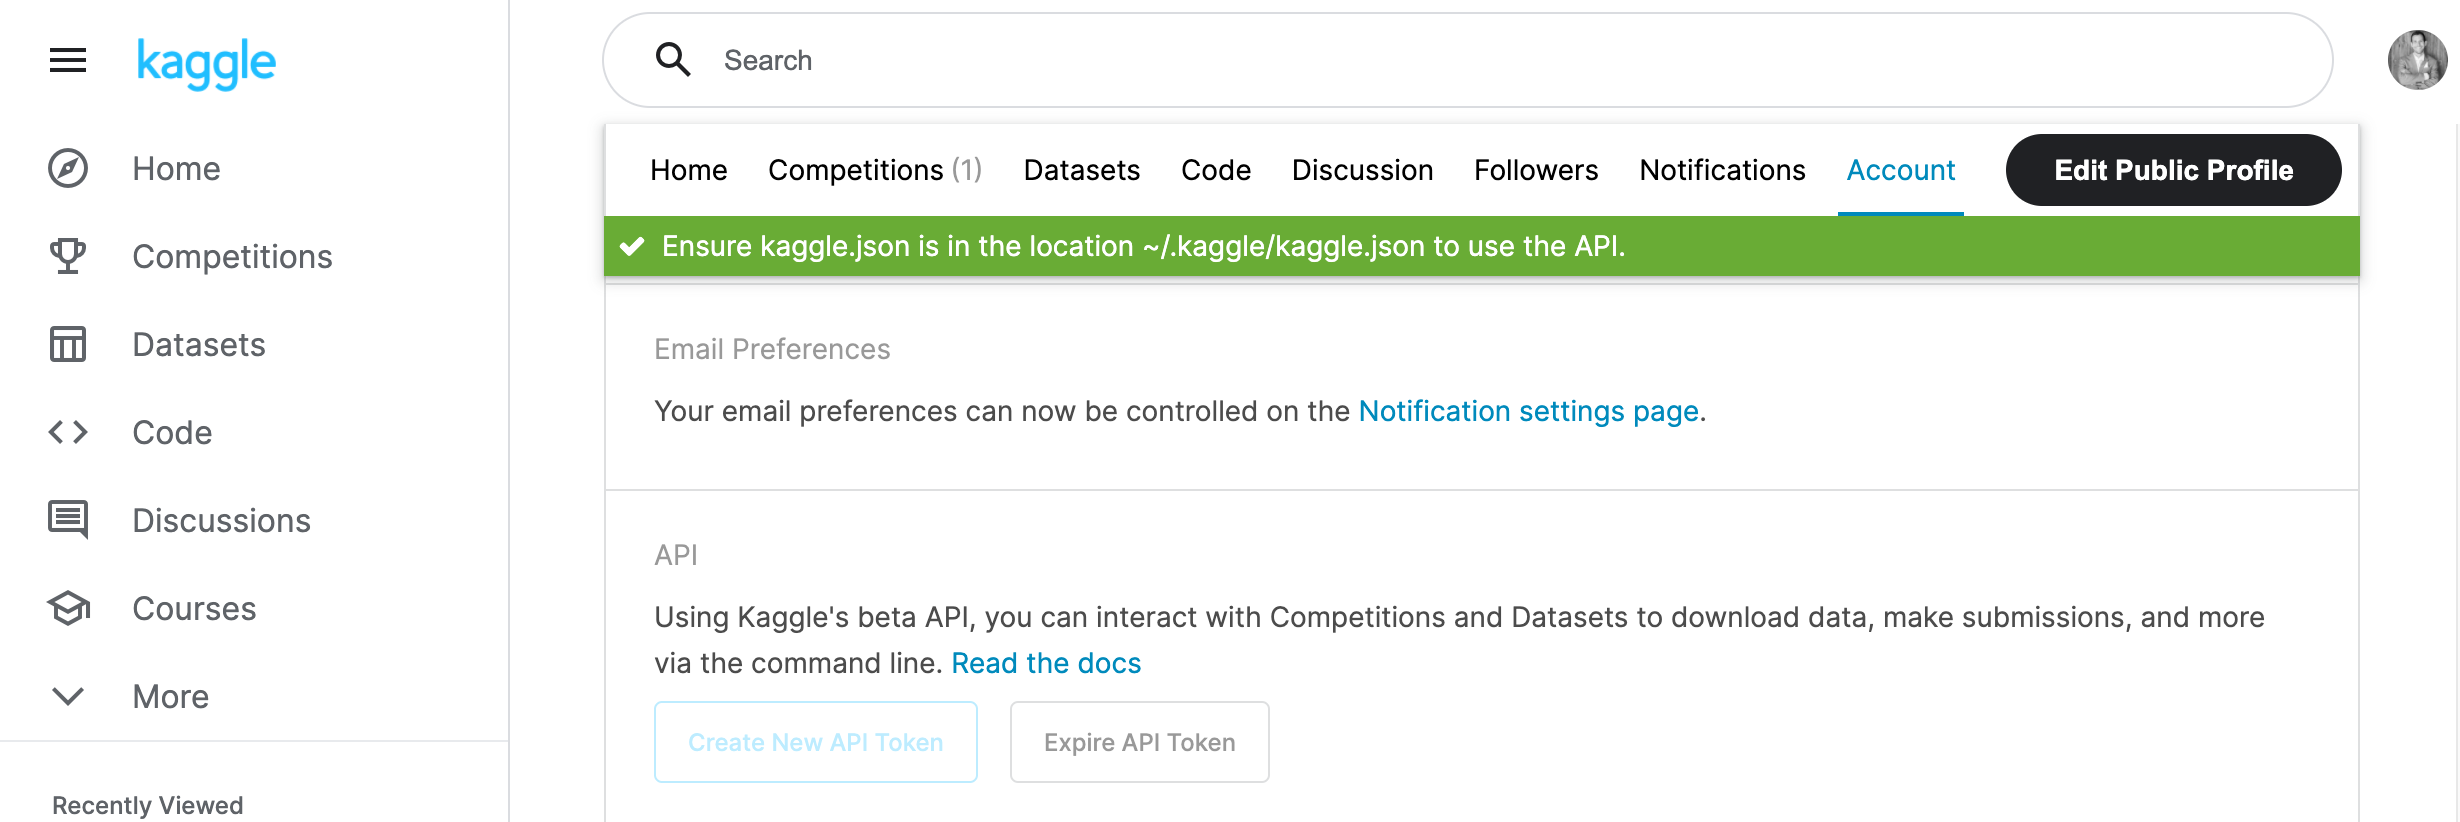
3. Open up `kaggle.json` and use the username and key.
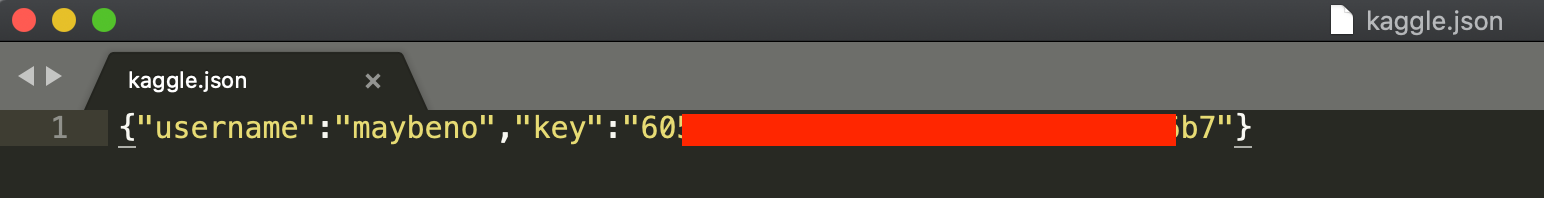

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

### Setup Kaggle API Key

In [15]:
!pip install -q Kaggle

!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c bike-sharing-demand
!unzip -o bike-sharing-demand.zip    

401 - Unauthorized
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


### Download and explore dataset

In [16]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import autogluon.core as ag

from autogluon.tabular import TabularPredictor

In [32]:
kaggle_username = "siddp6"
kaggle_key = "d4dacbd687dea298b1a64e8ce809636c"

with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
<!-- ![kaggle6.png](attachment:kaggle6.png) -->

In [18]:
train = pd.read_csv("train.csv",parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [21]:
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [22]:
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [23]:
predictor = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns": ["casual", "registered"]},
)


No path specified. Models will be saved in: "AutogluonModels/ag-20230602_140913/"


In [24]:
predictor.fit(train_data=train, time_limit=600, presets="best_quality")

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230602_140913/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2582.34 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 f

__presets="best_quality"__
- This argument specifies the preset configuration for the fitting process. In this case, the preset named "best_quality" is being used, indicating that the model should be trained with settings optimized for best quality

### Review AutoGluon's training run with ranking of models that did the best.

In [25]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.871786      11.857781  504.274996                0.000988           0.379923            3       True         16
1   RandomForestMSE_BAG_L2  -53.394699      10.855326  414.564875                0.588785          25.766391            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.970980      10.858333  396.636239                0.591793           7.837756            2       True         14
3          LightGBM_BAG_L2  -55.222937      10.603344  406.876146                0.336803          18.077662            2       True         11
4          CatBoost_BAG_L2  -55.740858      10.339412  452.213264                0.072871          63.414780            2       True         13
5        LightGBMXT_BAG_L2  -60.249680      13.601524  434.424200         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.871786      11.857781  504.274996                0.000988           0.379923            3       True         16
1   RandomForestMSE_BAG_L2  -53.394699      10.855326  414.564875                0.588785          25.766391            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.970980      10.858333  396.636239                0.591793           7.837756            2       True         14
3          LightGBM_BAG_L2  -55.222937      10.603344  406.876146                0.336803          18.077662            2       True         11
4          CatBoost_BAG_L2  -55.740858      10.339412  452.213264                0.072871          63.414780            2       True         13
5        LightGBMXT_BAG_L2  -60.249680      13.601524  434.424200                3.334984          45.625717            2       True    

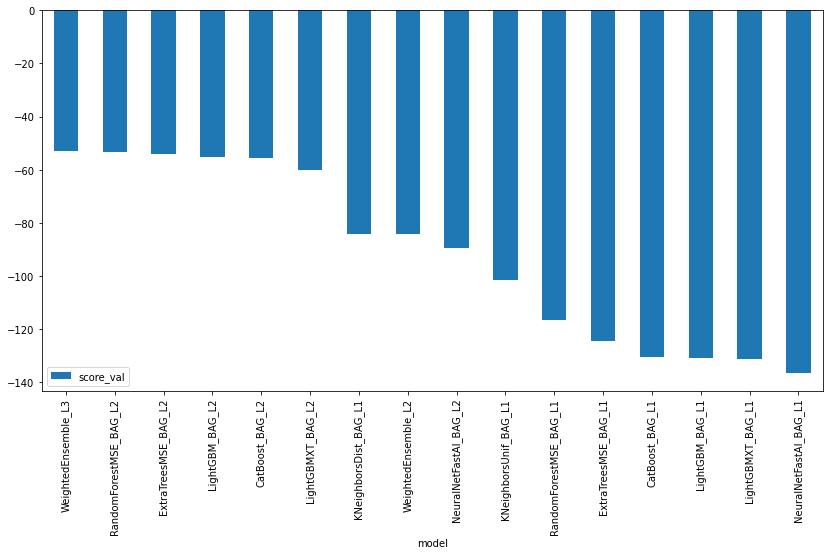

In [26]:
leaderboard_df = pd.DataFrame(predictor.leaderboard())
leaderboard_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.show()

Insight
- a very intersting things here is that top result giving is L_3, other are L_2 level and base models (L_1) does not seem to perform good here.

### Create predictions from test dataset

In [27]:
predictions = predictor.predict(test)
predictions.head()

0    23.123632
1    41.455280
2    45.221096
3    49.122555
4    52.208115
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [28]:
predictions[predictions < 0] = 0  

### Set predictions to submission dataframe, save, and submit

In [29]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [33]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "Initial Submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 395kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [35]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                                                                         status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission.csv               2023-06-02 14:26:04  Initial Submission                                                                                  complete  1.80958      1.80958       
submission_new_hyp_3.csv     2023-06-01 14:50:49  new features with hyperparameters epoch, boost round, learning rate, extra trees, drop-out, leaves  complete  0.49945      0.49945       
submission_new_hyp_2.csv     2023-06-01 14:50:46  new features with hyperparameters epoch, boost round, learning rate, extra trees                    complete  0.65221      0.65221       
submission_new_hyp_1.csv     2023-06-01 14:50:44  new featur

#### Initial score of 1.80958

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

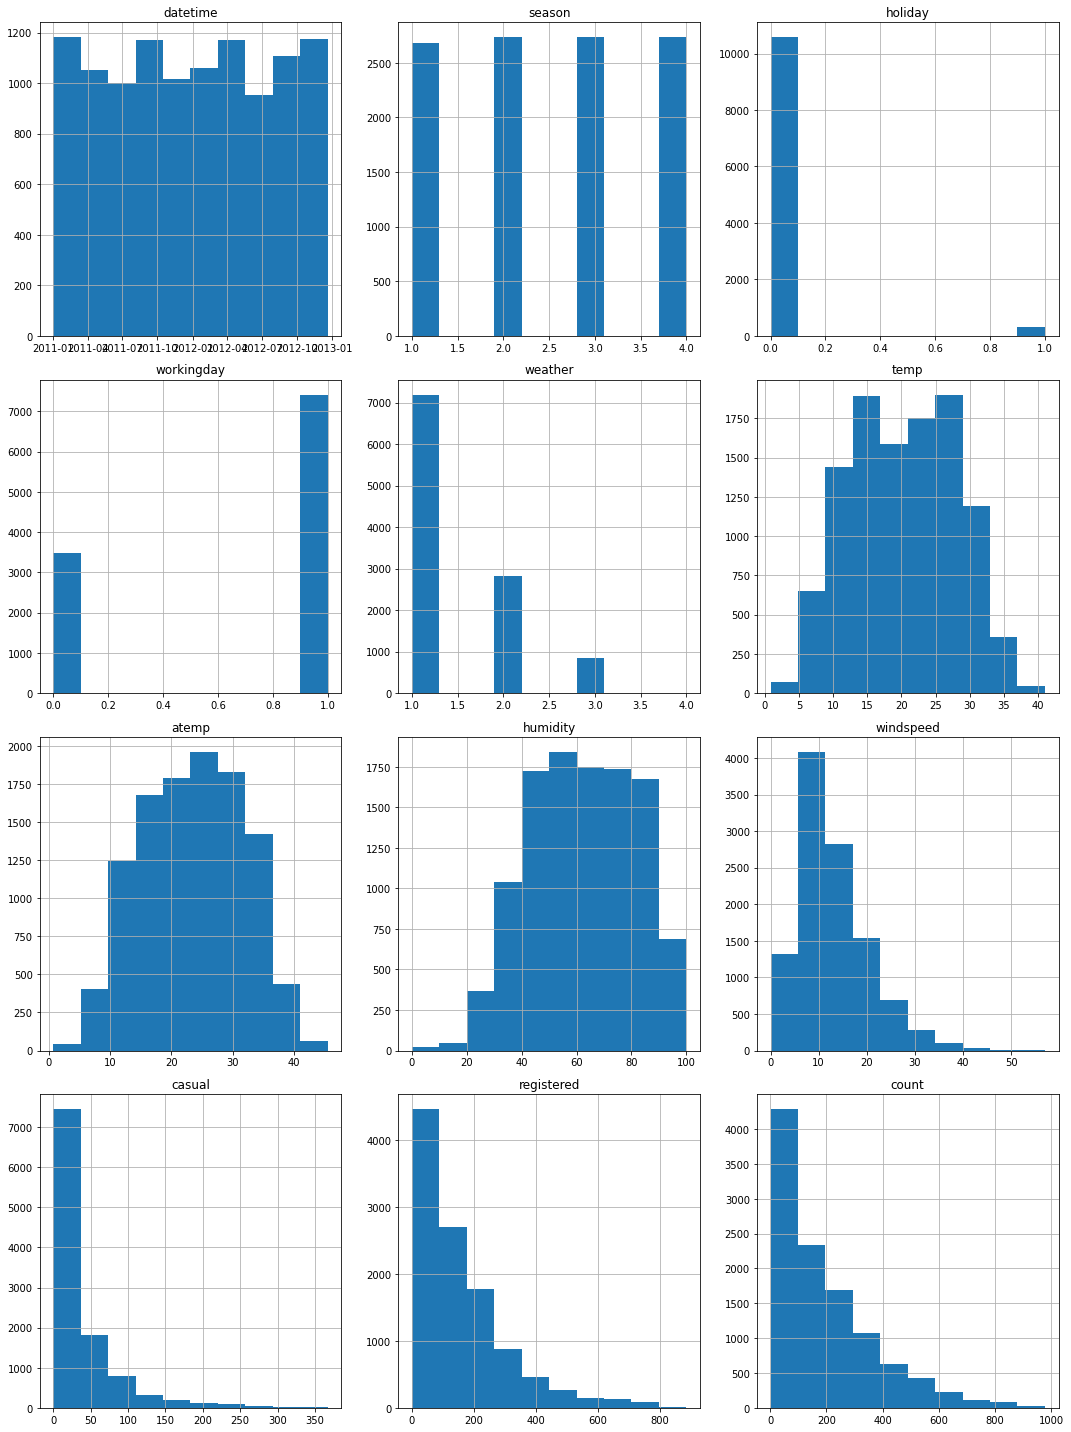

In [36]:
train.hist(figsize=(15,20))  
plt.tight_layout()
plt.show()

Insights:

- Season and weather are categorical variables, so we need to change their type as "category"
- Datetime feature, showing randomness as they represent timestamps, so it make more sense to create new feature by considering hours and day of week
- There are particular hour of day when people use bike most, like evening and morning. Same way people tend to do biking more on weekends. So it make complete sense to create these two as new feature.
- Also we can safely drop datetime column


In [37]:
train["hour"] = train["datetime"].dt.hour
train["day"] = train["datetime"].dt.dayofweek
train.drop(["datetime"], axis=1, inplace=True)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5


In [38]:
test["hour"] = test["datetime"].dt.hour
test["day"] = test["datetime"].dt.dayofweek
test.drop(["datetime"], axis=1, inplace=True)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day
0,1,0,1,1,10.66,11.365,56,26.0027,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,3


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [39]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [40]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5


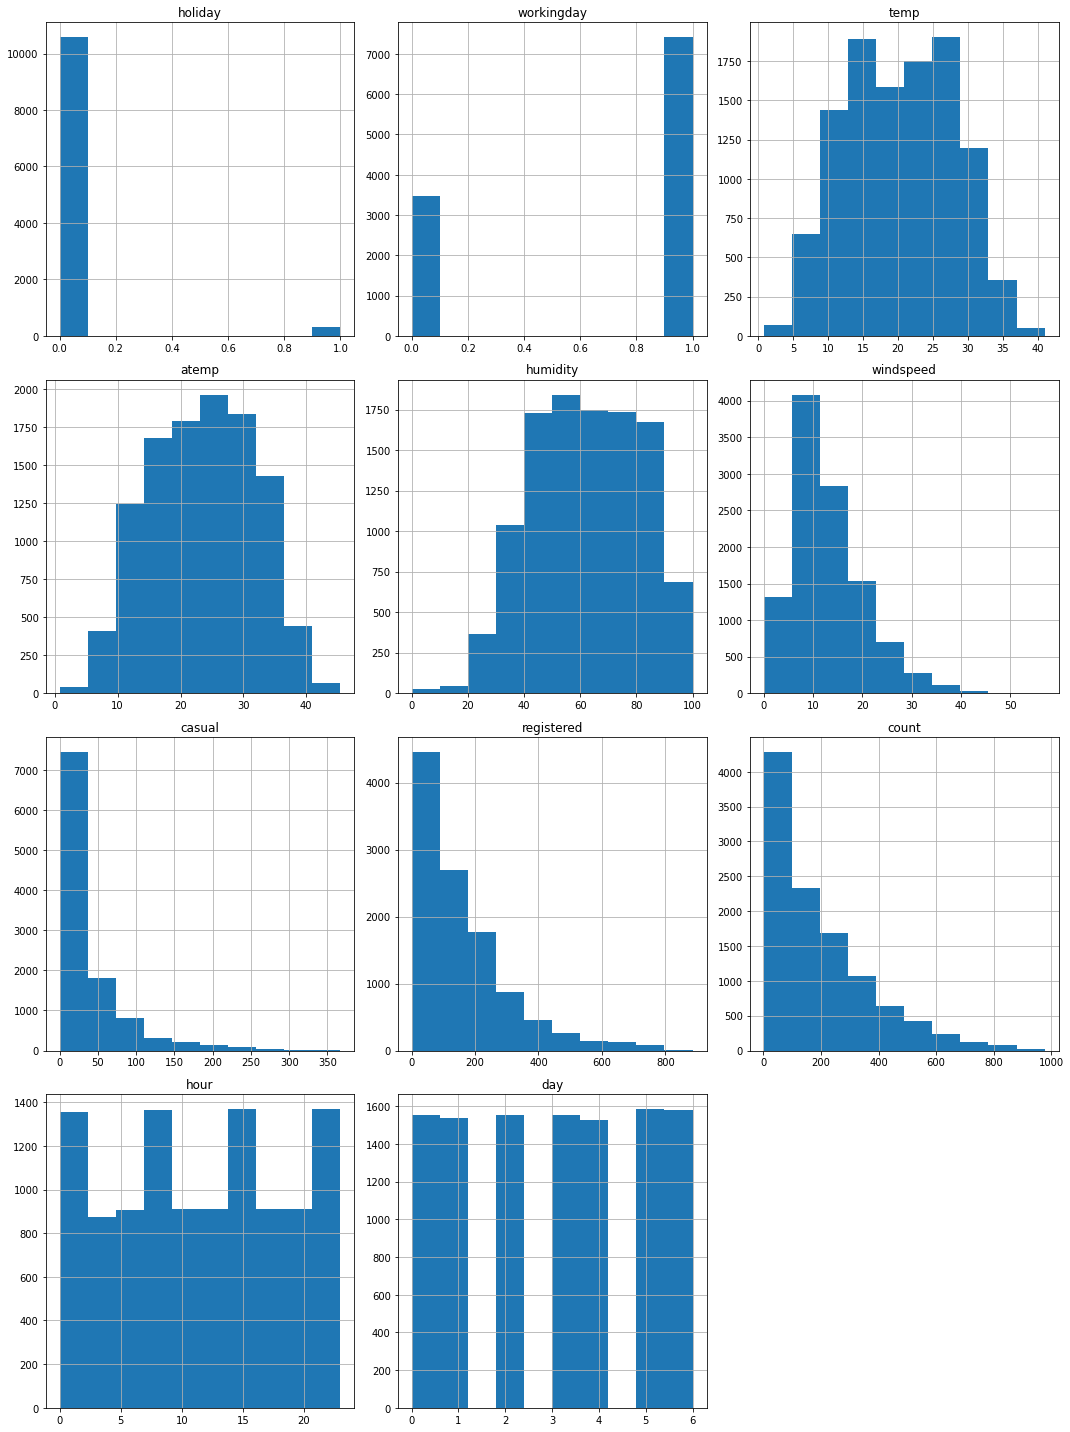

In [41]:
train.hist(figsize=(15, 20))
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [42]:
predictor_new_features = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns": ["casual", "registered"]},
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230602_143128/"


In [43]:
predictor_new_features.fit(train_data=train, time_limit=600, presets="best_quality")

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230602_143128/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2081.49 MB
	Train Data (Original)  Memory Usage: 0.72 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 f

In [44]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -58.196982      24.230838  515.107222                0.000712           0.418559            3       True         16
1   NeuralNetFastAI_BAG_L2  -58.516959      23.552197  457.729084                0.506768          60.633716            2       True         15
2          CatBoost_BAG_L2  -58.587186      23.127257  446.929289                0.081828          49.833921            2       True         13
3      WeightedEnsemble_L2  -58.896532      21.919335  345.734301                0.000733           0.440368            2       True          9
4     ExtraTreesMSE_BAG_L2  -59.236701      23.641531  404.221027                0.596102           7.125659            2       True         14
5          LightGBM_BAG_L2  -59.619095      23.154006  413.641091         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -117.06074757128302,
  'KNeighborsDist_BAG_L1': -114.0040450588242

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -58.196982      24.230838  515.107222                0.000712           0.418559            3       True         16
1   NeuralNetFastAI_BAG_L2  -58.516959      23.552197  457.729084                0.506768          60.633716            2       True         15
2          CatBoost_BAG_L2  -58.587186      23.127257  446.929289                0.081828          49.833921            2       True         13
3      WeightedEnsemble_L2  -58.896532      21.919335  345.734301                0.000733           0.440368            2       True          9
4     ExtraTreesMSE_BAG_L2  -59.236701      23.641531  404.221027                0.596102           7.125659            2       True         14
5          LightGBM_BAG_L2  -59.619095      23.154006  413.641091                0.108577          16.545723            2       True    

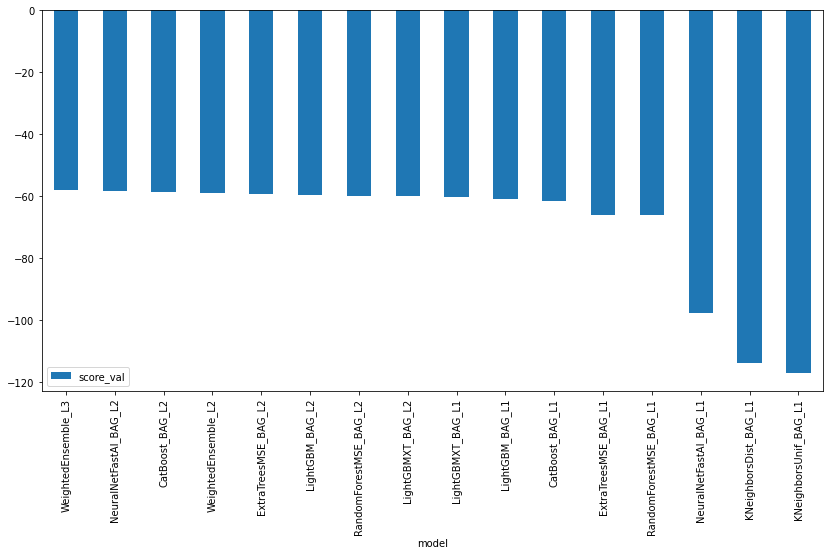

In [45]:
leaderboard_new_df = pd.DataFrame(predictor_new_features.leaderboard())
leaderboard_new_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.show()

Insight
- Again top result giver is L_3, other are L_2 level and base models (L_1) does not seem to perform good here.
- With two extra and more sensible feature we get better results
- one point to note here is that now with 2 new feature, L_1 show more relative improvement as compare to L_2 and L_3

In [46]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    19.169415
1     4.918484
2     2.845312
3     3.435486
4     2.997172
Name: count, dtype: float32

In [47]:
predictions_new_features.describe()
predictions_new_features[predictions_new_features < 0] = 0

In [48]:
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [49]:
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [50]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "Two new features (hours & Weekday)"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 339kB/s]
Successfully submitted to Bike Sharing Demand

In [51]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                                                                         status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-02 14:44:22  Two new features (hours & Weekday)                                                                  complete  0.50823      0.50823       
submission.csv               2023-06-02 14:26:04  Initial Submission                                                                                  complete  1.80958      1.80958       
submission_new_hyp_3.csv     2023-06-01 14:50:49  new features with hyperparameters epoch, boost round, learning rate, extra trees, drop-out, leaves  complete  0.49945      0.49945       
submission_new_hyp_2.csv     2023-06-01 14:50:46  new featur

#### New Score of 0.50823   

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [52]:
hyperparameters_1 = {
    "NN_TORCH": {
        "num_epochs": 100
    },  
    "GBM": {
        "num_boost_round": 1000
    },  
}

In [53]:
hyperparameters_2 = {
    "NN_TORCH": {
        "num_epochs": 100,
        "learning_rate": 1e-4,
    },
    "GBM": {
        "num_boost_round": 1000,
        "extra_trees": False,
    },
}


In [54]:
hyperparameters_3 = {  
    "GBM": {"extra_trees": False, "num_boost_round": 1000, "num_leaves": 5},
    "NN_TORCH": {"num_epochs": 100, "learning_rate": 1e-5, "dropout_prob": 0.001},
}

In [55]:
predictor_new_hp_1 = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns": ["casual", "registered"]},
)

predictor_new_hp_1.fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
    hyperparameters=hyperparameters_1,
    refit_full="best", # the predictor should be refit using the best configuration found during the initial fitting
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230602_145116/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230602_145116/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2103.44 MB
	Train Data (Original)  Memory Usage: 0.72 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features

In [56]:
predictor_new_hp_1.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L2 -60.386725       1.658752  306.940421                0.000860           0.155286            2       True          3
1         WeightedEnsemble_L3 -61.391586       1.979550  455.726671                0.000714           0.161280            3       True          6
2             LightGBM_BAG_L1 -61.564474       1.498764   20.368878                1.498764          20.368878            1       True          1
3             LightGBM_BAG_L2 -62.122728       1.749792  320.944915                0.091900          14.159780            2       True          4
4       NeuralNetTorch_BAG_L2 -62.148654       1.886936  441.405611                0.229044         134.620476            2       True          5
5       NeuralNetTorch_BAG_L1 -66.618550       0.159128  286.4

{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBM_BAG_L1_FULL': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1_FULL': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2_FULL': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -61.5644737203475,
  'NeuralNetTorch_BAG_L1': -66.61855036413591,
  'WeightedEnsemble_L2': -60.38672495183434,
  'LightGBM_BAG_L2': -62.12272806653446,
  'NeuralNetTorch_BAG_L2': -62.14865407732584,
  'WeightedEnsemble_L3': -61.39158630922291,
  'LightGBM_BAG_L1_FULL': None,
  'NeuralNetTorch_BAG_L1_FULL': None,
  'WeightedEnsemble_L2_FULL': None},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'Ligh

In [57]:
predictor_new_hp_2 = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns": ["casual", "registered"]},
)

predictor_new_hp_2.fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
    hyperparameters=hyperparameters_2,
    refit_full="best",
)


No path specified. Models will be saved in: "AutogluonModels/ag-20230602_145949/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230602_145949/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2102.57 MB
	Train Data (Original)  Memory Usage: 0.72 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features

In [58]:
predictor_new_hp_2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L2 -61.097221       1.683237  336.557773                0.000752           0.162342            2       True          3
1             LightGBM_BAG_L1 -61.564474       1.509014   20.598038                1.509014          20.598038            1       True          1
2         WeightedEnsemble_L3 -61.971928       1.998416  525.834985                0.000718           0.161558            3       True          6
3       NeuralNetTorch_BAG_L2 -62.637921       1.896030  511.121953                0.213546         174.726521            2       True          5
4             LightGBM_BAG_L2 -62.696003       1.784152  350.946906                0.101668          14.551474            2       True          4
5       NeuralNetTorch_BAG_L1 -71.043477       0.173471  315.7

{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBM_BAG_L1_FULL': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1_FULL': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2_FULL': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -61.5644737203475,
  'NeuralNetTorch_BAG_L1': -71.04347666821607,
  'WeightedEnsemble_L2': -61.09722067327154,
  'LightGBM_BAG_L2': -62.696003176824426,
  'NeuralNetTorch_BAG_L2': -62.63792135804677,
  'WeightedEnsemble_L3': -61.97192759418178,
  'LightGBM_BAG_L1_FULL': None,
  'NeuralNetTorch_BAG_L1_FULL': None,
  'WeightedEnsemble_L2_FULL': None},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'Lig

In [59]:
predictor_new_hp_3 = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error",
    learner_kwargs={"ignored_columns": ["casual", "registered"]},
)

predictor_new_hp_3.fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
    hyperparameters=hyperparameters_3,
    refit_full="best",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230602_150937/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230602_150937/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2102.48 MB
	Train Data (Original)  Memory Usage: 0.72 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features

In [60]:
predictor_new_hp_3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                         model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0          WeightedEnsemble_L3  -67.773843       1.514819  555.896756                0.001120           0.199394            3       True          6
1              LightGBM_BAG_L2  -67.915644       1.357257  341.512412                0.531536          15.597582            2       True          4
2              LightGBM_BAG_L1  -70.058891       0.668453   15.132133                0.668453          15.132133            1       True          1
3          WeightedEnsemble_L2  -70.058891       0.669166   15.305546                0.000713           0.173414            2       True          3
4        NeuralNetTorch_BAG_L2  -70.830043       0.982163  540.099780                0.156442         214.184949            2       True          5
5        NeuralNetTorch_BAG_L1 -121.079245       0

{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBM_BAG_L1_FULL': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1_FULL': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_BAG_L2_FULL': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L2_FULL': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3_FULL': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -70.05889100702171,
  'NeuralNetTorch_BAG_L1': -121.07924503250442,
  'WeightedEnsemble_L2': -70.05889100702171,
  'LightGBM_BAG_L2': -67.91564392527927,
  'NeuralNetTorch_BAG_L2': -70.83004257667291,
  'WeightedEnsemble_L3': -67.77384252549753,
  'LightGBM_BAG_L1_FULL': None,
 

In [61]:
# Leaderboard dataframe
leaderboard_new_hp_df_1 = pd.DataFrame(predictor_new_hp_1.leaderboard(silent=True))
leaderboard_new_hp_df_1

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-60.386725,1.658752,306.940421,0.000860,0.155286,2,True,3
1,WeightedEnsemble_L3,-61.391586,1.979550,455.726671,0.000714,0.161280,3,True,6
2,LightGBM_BAG_L1,-61.564474,1.498764,20.368878,1.498764,20.368878,1,True,1
3,LightGBM_BAG_L2,-62.122728,1.749792,320.944915,0.091900,14.159780,2,True,4
4,NeuralNetTorch_BAG_L2,-62.148654,1.886936,441.405611,0.229044,134.620476,2,True,5
5,NeuralNetTorch_BAG_L1,-66.618550,0.159128,286.416256,0.159128,286.416256,1,True,2
6,WeightedEnsemble_L2_FULL,NaN,NaN,40.452355,NaN,0.155286,2,True,9
7,NeuralNetTorch_BAG_L1_FULL,NaN,NaN,39.006562,NaN,39.006562,1,True,8
8,LightGBM_BAG_L1_FULL,NaN,NaN,1.290507,NaN,1.290507,1,True,7


In [62]:
# Leaderboard dataframe
leaderboard_new_hp_df_2 = pd.DataFrame(predictor_new_hp_2.leaderboard(silent=True))
leaderboard_new_hp_df_2

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-61.097221,1.683237,336.557773,0.000752,0.162342,2,True,3
1,LightGBM_BAG_L1,-61.564474,1.509014,20.598038,1.509014,20.598038,1,True,1
2,WeightedEnsemble_L3,-61.971928,1.998416,525.834985,0.000718,0.161558,3,True,6
3,NeuralNetTorch_BAG_L2,-62.637921,1.896030,511.121953,0.213546,174.726521,2,True,5
4,LightGBM_BAG_L2,-62.696003,1.784152,350.946906,0.101668,14.551474,2,True,4
5,NeuralNetTorch_BAG_L1,-71.043477,0.173471,315.797393,0.173471,315.797393,1,True,2
6,WeightedEnsemble_L2_FULL,NaN,NaN,45.805062,NaN,0.162342,2,True,9
7,NeuralNetTorch_BAG_L1_FULL,NaN,NaN,44.364559,NaN,44.364559,1,True,8
8,LightGBM_BAG_L1_FULL,NaN,NaN,1.278162,NaN,1.278162,1,True,7


Insight:
- This is the only time when we do not see L_3 as top models

In [63]:
# Leaderboard dataframe
leaderboard_new_hp_df_3 = pd.DataFrame(predictor_new_hp_3.leaderboard(silent=True))
leaderboard_new_hp_df_3

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-67.773843,1.514819,555.896756,0.001120,0.199394,3,True,6
1,LightGBM_BAG_L2,-67.915644,1.357257,341.512412,0.531536,15.597582,2,True,4
2,LightGBM_BAG_L1,-70.058891,0.668453,15.132133,0.668453,15.132133,1,True,1
3,WeightedEnsemble_L2,-70.058891,0.669166,15.305546,0.000713,0.173414,2,True,3
4,NeuralNetTorch_BAG_L2,-70.830043,0.982163,540.099780,0.156442,214.184949,2,True,5
5,NeuralNetTorch_BAG_L1,-121.079245,0.157268,310.782698,0.157268,310.782698,1,True,2
6,WeightedEnsemble_L3_FULL,NaN,NaN,77.330257,NaN,0.199394,3,True,11
7,NeuralNetTorch_BAG_L2_FULL,NaN,NaN,76.589440,NaN,30.516695,2,True,10
8,NeuralNetTorch_BAG_L1_FULL,NaN,NaN,45.188005,NaN,45.188005,1,True,8
9,LightGBM_BAG_L2_FULL,NaN,NaN,46.614167,NaN,0.541422,2,True,9


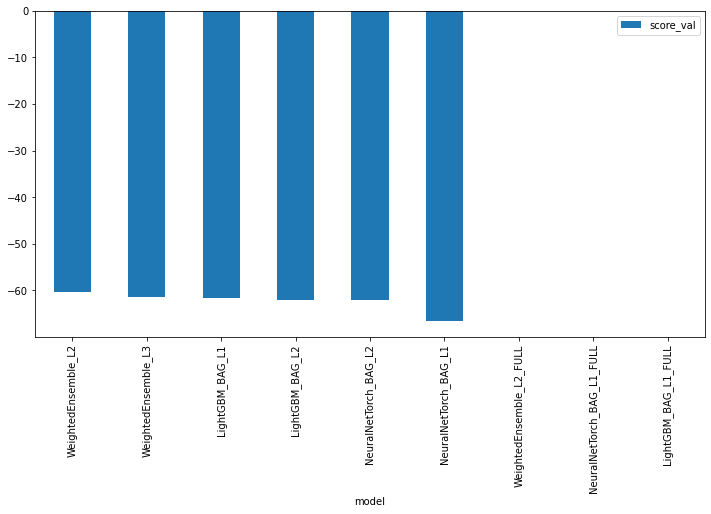

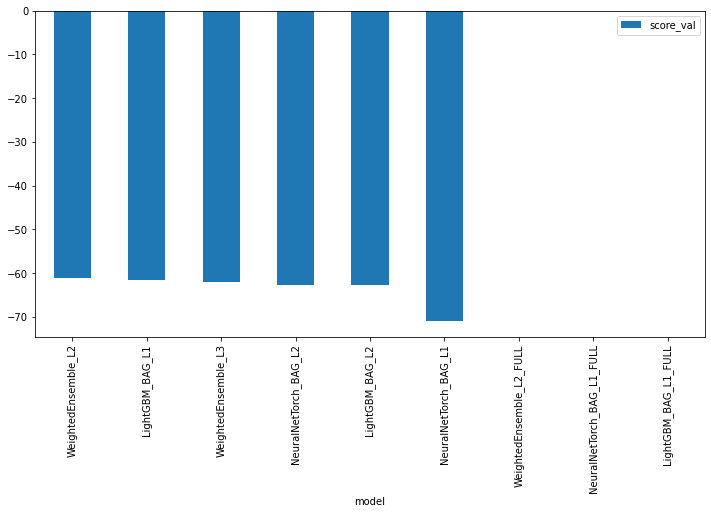

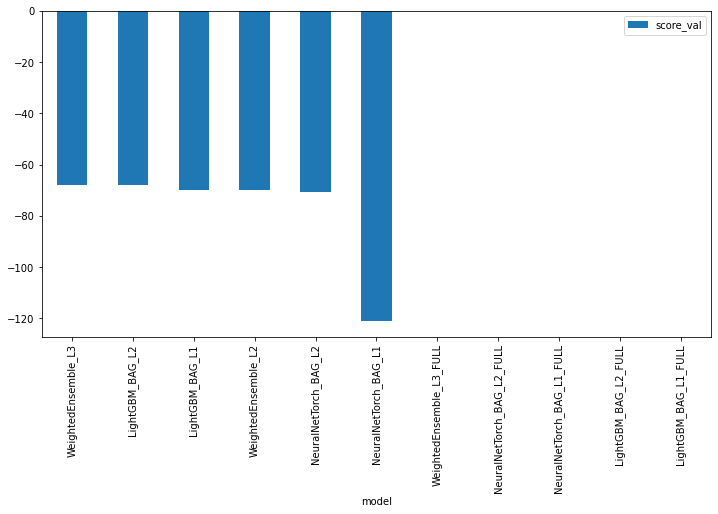

In [64]:
leaderboard_new_hp_df_1.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
leaderboard_new_hp_df_2.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
leaderboard_new_hp_df_3.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.show()

Insight:
- WeightedEnsemble is best in all cases, so this can be the model to experiment more with
- Also NN_Torch is not showing any good relative progess across all cases, so it can be safe to remove it

In [65]:
predictions_new_hyp_1 = predictor_new_hp_1.predict(test)
predictions_new_hyp_1.head()

0    18.348980
1     4.918410
2     1.559165
3     2.262614
4     2.383590
Name: count, dtype: float32

In [66]:
predictions_new_hyp_2 = predictor_new_hp_2.predict(test)
predictions_new_hyp_2.head()

0    18.680775
1     4.052975
2     0.661192
3     1.742600
4     1.751991
Name: count, dtype: float32

In [67]:
predictions_new_hyp_3 = predictor_new_hp_3.predict(test)
predictions_new_hyp_3.head()

0    21.138212
1    10.469967
2    10.244417
3     9.903305
4    10.091461
Name: count, dtype: float32

In [68]:
predictions_new_hyp_1[predictions_new_hyp_1<0] = 0 
predictions_new_hyp_2[predictions_new_hyp_2<0] = 0 
predictions_new_hyp_3[predictions_new_hyp_3<0] = 0 

In [69]:
submission_new_hyp_1 = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hyp_1["count"] = predictions_new_hyp_1
submission_new_hyp_1.to_csv("submission_new_hyp_1.csv", index=False)

submission_new_hyp_2 = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hyp_2["count"] = predictions_new_hyp_2
submission_new_hyp_2.to_csv("submission_new_hyp_2.csv", index=False)

submission_new_hyp_3 = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hyp_3["count"] = predictions_new_hyp_3
submission_new_hyp_3.to_csv("submission_new_hyp_3.csv", index=False)

In [70]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hyp_1.csv -m "new features with hyperparameters epoch, boost round"
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hyp_2.csv -m "new features with hyperparameters epoch, boost round, learning rate, extra trees"
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hyp_3.csv -m "new features with hyperparameters epoch, boost round, learning rate, extra trees, drop-out, leaves"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 454kB/s]
100%|█████████████████████████████████████████| 187k/187k [00:00<00:00, 380kB/s]
100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 364kB/s]
Successfully submitted to Bike Sharing Demand

In [71]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                                                                         status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------------------------------------------------------------------  --------  -----------  ------------  
submission_new_hyp_3.csv     2023-06-02 15:20:48  new features with hyperparameters epoch, boost round, learning rate, extra trees, drop-out, leaves  complete  0.51814      0.51814       
submission_new_hyp_2.csv     2023-06-02 15:20:45  new features with hyperparameters epoch, boost round, learning rate, extra trees                    complete  0.57940      0.57940       
submission_new_hyp_1.csv     2023-06-02 15:20:43  new features with hyperparameters epoch, boost round                                                complete  0.54777      0.54777       
submission_new_features.csv  2023-06-02 14:44:22  Two new fe

#### New Score

- Hy1:  0.50823
- Hy2:  0.57940
- Hy3:  0.51814   


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

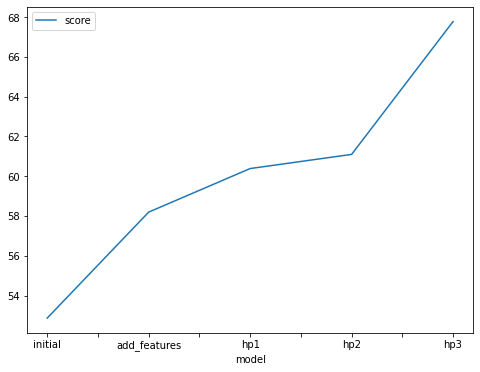

In [77]:
fig = (
    pd.DataFrame(
        {
            "model": ["initial", "add_features", "hp1", "hp2", "hp3"],
            "score": [52.871786, 58.196982, 60.386725, 61.097221, 67.773843],
        }
    )
    .plot(x="model", y="score", figsize=(8, 6))
    .get_figure()
)
fig.savefig("model_train_score.png")


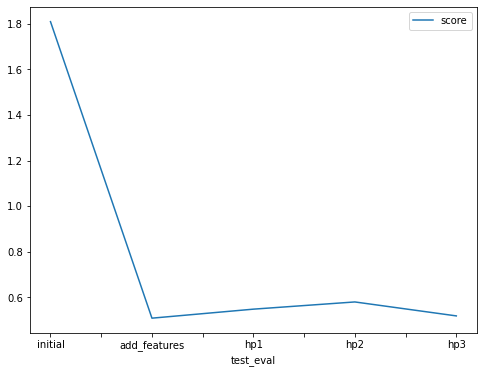

In [78]:
fig = (
    pd.DataFrame(
        {
            "test_eval": ["initial", "add_features", "hp1", "hp2", "hp3"],
            "score": [1.80958, 0.50823, 0.54777, 0.57940, 0.51814],
        }
    )
    .plot(x="test_eval", y="score", figsize=(8, 6))
    .get_figure()
)
fig.savefig("model_test_score.png")

Conclusion
- Approach was simple, to change the default values, and see which direction gives better result. This is very basic approach, but result are good as compare to very initial solution
- Best model is to use WeightedEnsemble_L3 and two extra features. All default hyperparameter
- Although Model with hyp_3 does show some better result as compare to hyp_2, so we can go ahead in that direction by changing drop-out and extra tree.


### Hyperparameter table

In [79]:
pd.DataFrame({
    "model": ["initial", "add_features", "hp1", "hp2", "hp3"],
    "hpo1": ["default", "default", "epoch, boost round", "epoch, boost round", "epoch, boost round"],
    "hpo2": ["default", "default", "default", "learning rate, extra trees", "learning rate, extra trees"],
    "hpo3": ["default", "default", "default", "default", "drop-out, leaves"],
    "score": [1.80958, 0.50823, 0.54777, 0.57940, 0.51814]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.80958
1,add_features,default,default,default,0.50823
2,hp1,"epoch, boost round",default,default,0.54777
3,hp2,"epoch, boost round","learning rate, extra trees",default,0.57940
4,hp3,"epoch, boost round","learning rate, extra trees","drop-out, leaves",0.51814
